<a href="https://colab.research.google.com/github/victoralfayo/my_machine_learning/blob/main/AbaloneKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dataset

In [1]:
import pandas as pd

In [2]:
url = (
     "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
)

In [7]:
abalone = pd.read_csv(url, header=None)

In [8]:
abalone

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
abalone.columns = [
     "Sex",
     "Length",
     "Diameter",
     "Height",
     "Whole weight",
     "Shucked weight",
     "Viscera weight",
     "Shell weight",
     "Rings",
 ]

In [11]:
abalone = abalone.drop('Sex', axis=1)

Descriptive Statistics From the Abalone Dataset

In [12]:
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


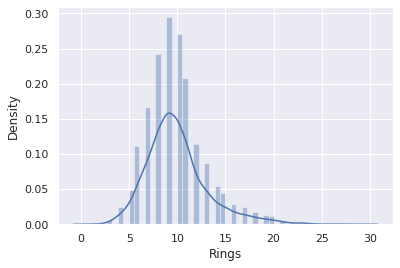

In [14]:
sns.distplot(abalone['Rings'])

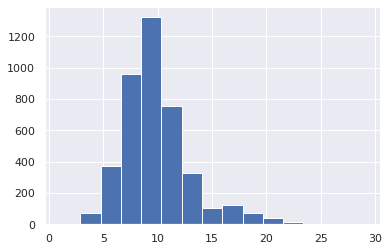

In [16]:
import matplotlib.pyplot as plt
abalone['Rings'].hist(bins=15)
plt.show()

In [17]:
correlation_matrix = abalone.corr()
correlation_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

Find the k Nearest Neighbors

In [22]:
import numpy as np
a = np.array([2, 4])
b = np.array([2, 4])
np.linalg.norm(a - b)

0.0

In [23]:
X = abalone.drop('Rings', axis=1)
X = X.values
y = abalone['Rings']
y = y.values

This code block generates two objects that now contain your data: X and y. X is the independent variables and y is the dependent variable of your model. Note that you use a capital letter for X but a lowercase letter for y. This is often done in machine learning code because mathematical notation generally uses a capital letter for matrices and a lowercase letter for vectors.

In [24]:
new_data_point = np.array([
     0.569552,
     0.446407,
     0.154437,
     1.016849,
     0.439051,
     0.222526,
     0.291208,
 ])

In [26]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [27]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644])

This tells you which three neighbors are closest to your new_data_point

**Voting or Averaging of Multiple Neighbors**

In [28]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10])